In [117]:
# IMPORT LIBRARY
from os import X_OK
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, average_precision_score, f1_score


data = pd.read_csv (r"D:\DOCUMENT\University\UNAIR\KULIAH\SEM 5\ANALISIS DAN VISUALISASI DATA\9 random forest\artikel + dataset\early+stage+diabetes+risk+prediction+dataset\diabetes_data_upload.csv")
print('Dataset :',data.shape)
data[:10] #read first 10 data

df = pd.DataFrame(data)
df


Dataset : (520, 17)


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [118]:
# change yes no to 1 0

columns_to_convert = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                      'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                      'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 
                      'Obesity']

for column in columns_to_convert:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

data[:10] #read first 10 data


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
5,55,Male,1,1,0,1,1,0,1,1,0,1,0,1,1,1,Positive
6,57,Male,1,1,0,1,1,1,0,0,0,1,1,0,0,0,Positive
7,66,Male,1,1,1,1,0,0,1,1,1,0,1,1,0,0,Positive
8,67,Male,1,1,0,1,1,1,0,1,1,0,1,1,0,1,Positive
9,70,Male,0,1,1,1,1,0,1,1,1,0,0,0,1,0,Positive


In [119]:
# change positive negative to 1 0
columns_to_convert = ['class']

for column in columns_to_convert:
    data[column] = data[column].map({'Positive': 1, 'Negative': 0})

data[:10] #read first 10 data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,Male,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,Male,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,Male,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,Male,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,Male,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [120]:
# change male female to 1 0
columns_to_convert = ['Gender']

for column in columns_to_convert:
    data[column] = data[column].map({'Male': 0, 'Female': 1})

data[:10] #read first 10 data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [121]:
correlation_matrix = data.corr(method='pearson')
correlation_matrix

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,-0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
Gender,-0.062872,1.000000,0.268894,0.312262,0.281840,0.124490,0.219968,-0.208961,0.208092,0.052496,0.013735,0.101978,0.332288,0.090542,-0.327871,0.005396,0.449233
Polyuria,0.199781,0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
Polydipsia,0.137382,0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden weight loss,0.064808,0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
Polyphagia,0.315577,0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
Genital thrush,0.096519,-0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual blurring,0.402729,0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
Itching,0.296559,0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


Negatif diabetes :  200
Positif diabetes :  320


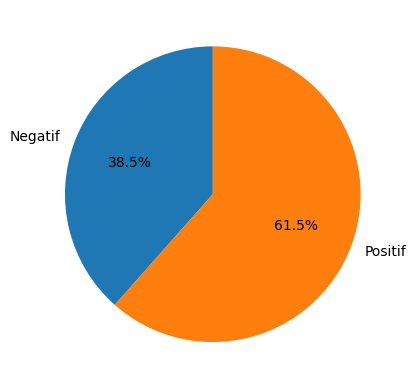

In [122]:
# Get the count of Neg
count_neg = data['class'].value_counts()[0]

print('Negatif diabetes : ', count_neg)

# Get the count of Pos
count_pos = data['class'].value_counts()[1]

print('Positif diabetes : ', count_pos)

y = np.array([count_neg, count_pos])
pie_label = ["Negatif", "Positif"]

plt.pie(y, labels=pie_label, autopct='%1.1f%%', startangle=90)
plt.show() 

<Axes: >

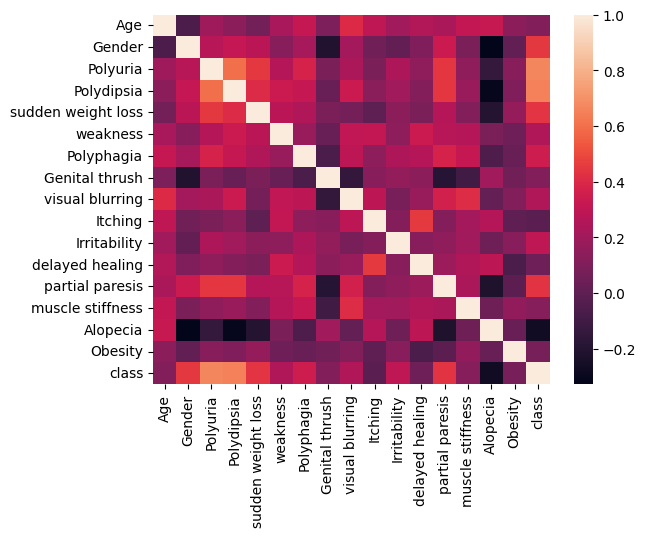

In [123]:
sns.heatmap(data.corr())

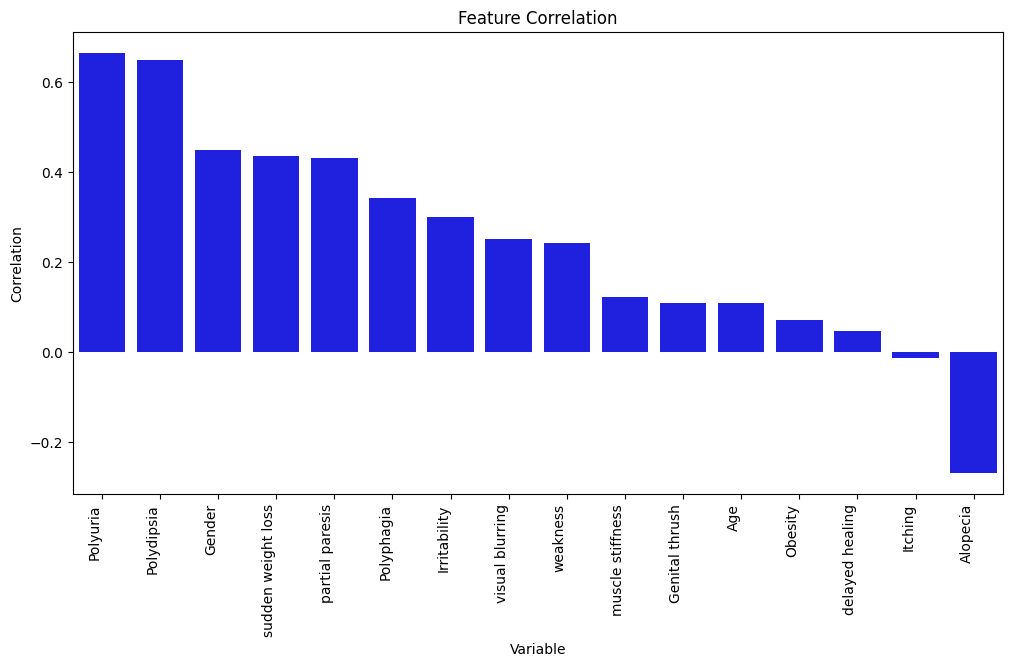

In [124]:

# DataFrame
correlation_matrix = data.corr(method='pearson')

# Extract correlations with the 'class' column
class_correlations = correlation_matrix['class'].drop('class')  # Exclude correlation with itself

# Sort correlations in descending order
class_correlations_sorted = class_correlations.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=class_correlations_sorted.index, y=class_correlations_sorted.values, color='blue')
plt.title('Feature Correlation')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()


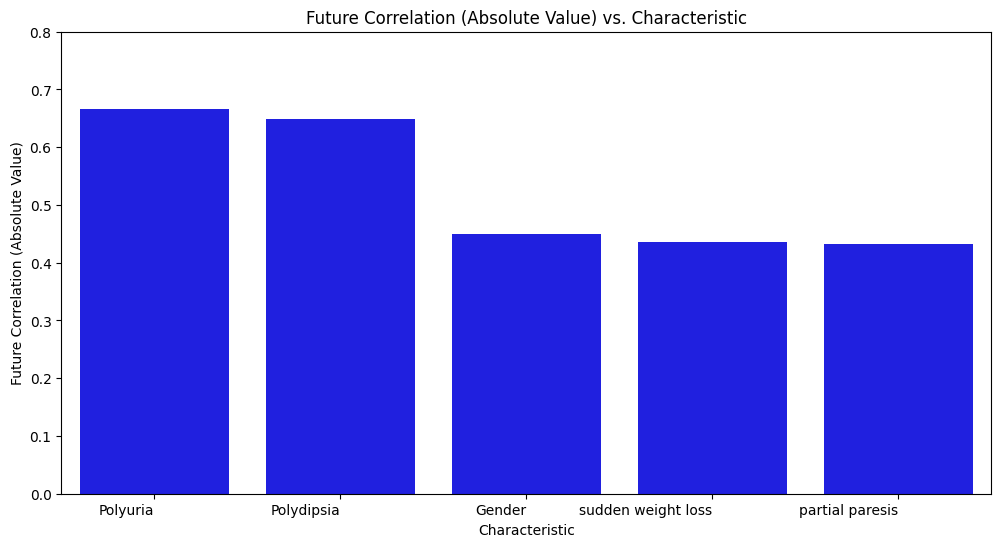

In [125]:
# top 5 highest correlation


correlation_matrix = data.corr(method='pearson')

# Extract correlations with the 'class' column
class_correlations = correlation_matrix['class'].drop('class')  # Exclude correlation with itself

# Sort correlations in descending order
class_correlations_sorted = class_correlations.sort_values(ascending=False)

# Select the top 5 highest correlations
top_5_correlations = class_correlations_sorted.head(5)

# Create a bar plot for the top 5 highest correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_correlations.index, y=top_5_correlations.values, color='blue')
plt.title('Future Correlation (Absolute Value) vs. Characteristic')
plt.xlabel('Characteristic')
plt.ylabel('Future Correlation (Absolute Value)')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability

# Set y-axis limits
plt.ylim(0.0, 0.8)

plt.show()


Accuracy: 0.9923
Precision: 0.9958
F1-Score: 0.9940
Confusion Matrix:
[[46  0]
 [ 1 83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        84

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



<Axes: >

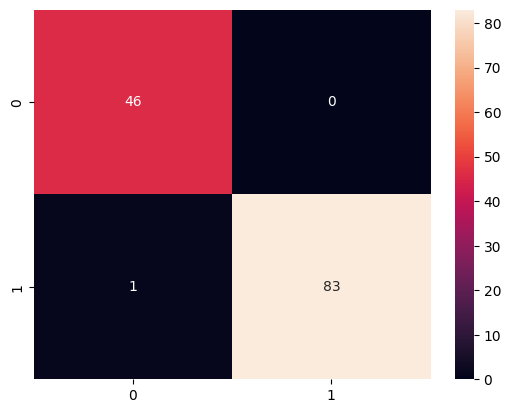

In [126]:
# ------------- RANDOM FOREST CLASSIFICATION (ALL VARIABLE) ---------------

# target = kolom "class"
X = data.drop('class', axis=1)
y = data['class']

# Split the data  (training=75 and testing=25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_all_75 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_all_75 = precision

f1score = f1_score(y_test, y_pred)

f1score_all_75 = f1score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy_all_75:.4f}')
print(f'Precision: {precision_all_75:.4f}')
print(f'F1-Score: {f1score_all_75:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

Accuracy: 0.9904
Precision: 0.9955
F1-Score: 0.9929
Confusion Matrix:
[[33  0]
 [ 1 70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



<Axes: >

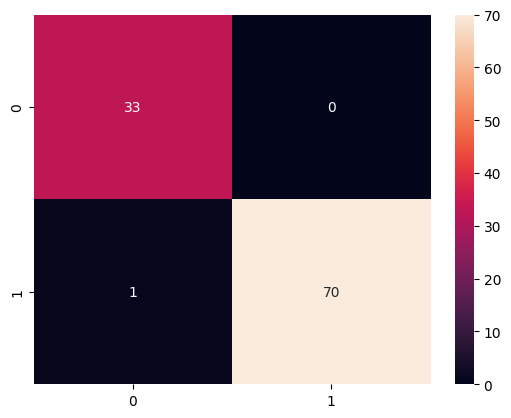

In [127]:
# ------------- RANDOM FOREST CLASSIFICATION (ALL VARIABLE) ---------------

# target = kolom "class"
X = data.drop('class', axis=1)
y = data['class']

# Split the data  (training=80 and testing=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_all_80 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_all_80 = precision

f1score = f1_score(y_test, y_pred)

f1score_all_80 = f1score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy_all_80:.4f}')
print(f'Precision: {precision_all_80:.4f}')
print(f'F1-Score: {f1score_all_80:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

Accuracy: 0.9936
Precision: 0.9966
F1-Score: 0.9951
Confusion Matrix:
[[ 54   0]
 [  1 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



<Axes: >

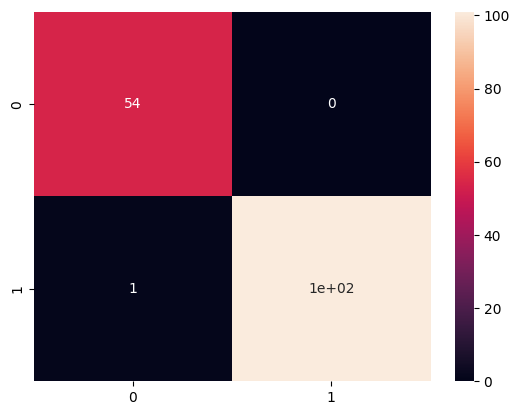

In [128]:
# ------------- RANDOM FOREST CLASSIFICATION (ALL VARIABLE) ---------------

# target = kolom "class"
X = data.drop('class', axis=1)
y = data['class']

# Split the data  (training=70 and testing=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_all_70 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_all_70 = precision

f1score = f1_score(y_test, y_pred)

f1score_all_70 = f1score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy_all_70:.4f}')
print(f'Precision: {precision_all_70:.4f}')
print(f'F1-Score: {f1score_all_70:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

Accuracy: 0.9760
Precision: 0.9862
F1-Score: 0.9807
Confusion Matrix:
[[ 76   0]
 [  5 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        76
           1       1.00      0.96      0.98       132

    accuracy                           0.98       208
   macro avg       0.97      0.98      0.97       208
weighted avg       0.98      0.98      0.98       208



<Axes: >

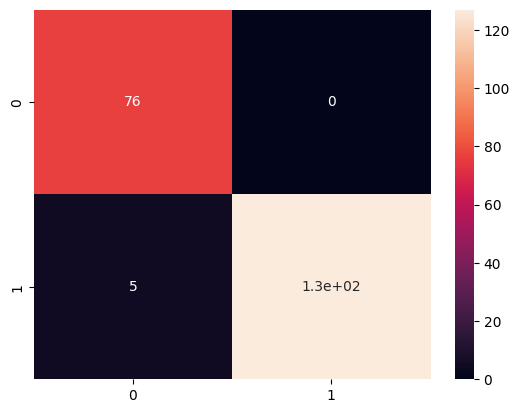

In [129]:
# ------------- RANDOM FOREST CLASSIFICATION (ALL VARIABLE) ---------------

# target = kolom "class"
X = data.drop('class', axis=1)
y = data['class']

# Split the data  (training=60 and testing=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_all_60 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_all_60 = precision

f1score = f1_score(y_test, y_pred)

f1score_all_60 = f1score

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy_all_60:.4f}')
print(f'Precision: {precision_all_60:.4f}')
print(f'F1-Score: {f1score_all_60:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

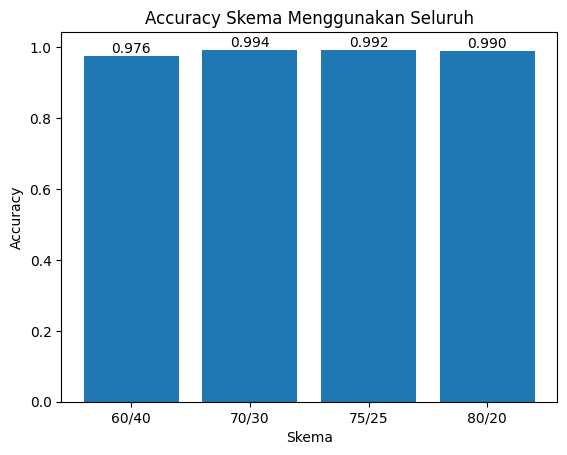

In [130]:
import matplotlib.pyplot as plt

skema = ['60/40', '70/30', '75/25', '80/20']
akurasi_skema = [accuracy_all_60, accuracy_all_70, accuracy_all_75, accuracy_all_80]
presisi_skema = [precision_all_60, precision_all_70, precision_all_75, precision_all_80]

# subplot 1
plt.bar(skema, akurasi_skema)
plt.title('Accuracy Skema Menggunakan Seluruh')
plt.xlabel('Skema')
plt.ylabel('Accuracy')

# Adding labels to the bars
for i in range(len(skema)):
    plt.text(skema[i], akurasi_skema[i], f'{akurasi_skema[i]:.3f}', ha='center', va='bottom')

# 3f nya buat naro 3 angka di belakang koma
plt.show()


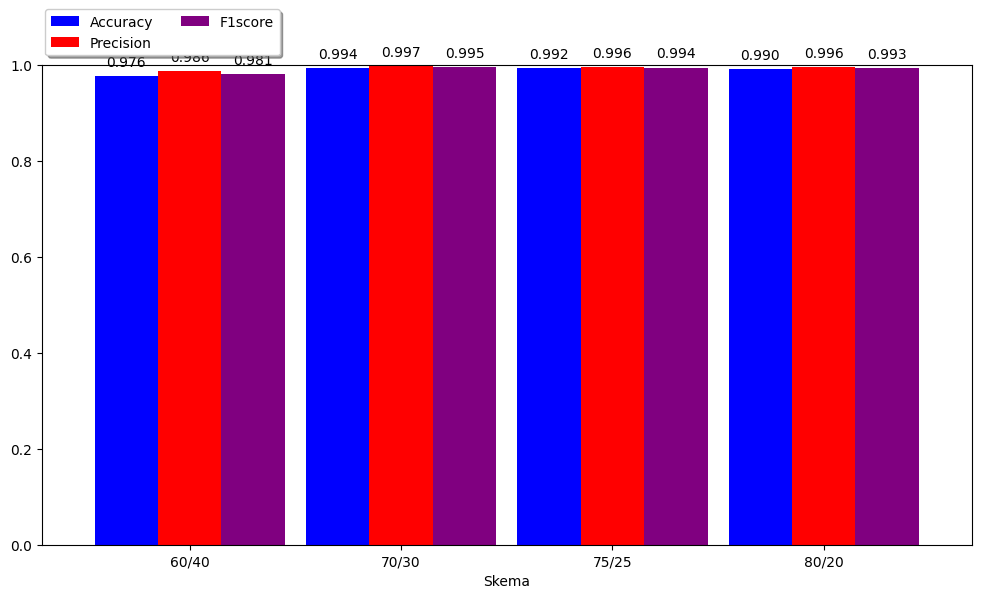

In [131]:
# Library Import(numpy and matplotlib)
import pandas as pd 
import matplotlib.pyplot as plot 

# Make a data definition
_data=[["60/40",accuracy_all_60, precision_all_60, f1score_all_60],
      ["70/30",accuracy_all_70, precision_all_70, f1score_all_70],
      ["75/25",accuracy_all_75, precision_all_75, f1score_all_75],
      ["80/20",accuracy_all_80, precision_all_80, f1score_all_80]
     ]
 
# Colors 
graph_color =['blue', 'red', 'purple']
 
# Draw a multi-colored bar chart.
_df = pd.DataFrame(_data,columns=["Skema", "Accuracy", "Precision", "F1score"])
 
ax = _df.plot(x="Skema", y=["Accuracy", "Precision", "F1score"], kind="bar", figsize=(12,6), color=graph_color, width=0.9)

# Set y-axis range from 0.0 to 1.0
ax.set_ylim(0.0, 1.0)

# Adjust the top margin without affecting the height of the graph
plt.subplots_adjust(bottom=0.1, top=0.9)

ax.legend(["Accuracy", "Precision", "F1score"], loc='upper center', bbox_to_anchor=(0.13, 1.13), fancybox=True, shadow=True, ncol=2)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


In [132]:
# DATA BARU 5 CORRELATION TERBESAR

selected_columns = ['Polyuria', 'Polydipsia', 'Gender', 'sudden weight loss', 'partial paresis', 'class']

# New dataframe
new_data = data[selected_columns].copy()

print(new_data)


     Polyuria  Polydipsia  Gender  sudden weight loss  partial paresis  class
0           0           1       0                   0                0      1
1           0           0       0                   0                1      1
2           1           0       0                   0                0      1
3           0           0       0                   1                0      1
4           1           1       0                   1                1      1
..        ...         ...     ...                 ...              ...    ...
515         1           1       1                   1                1      1
516         1           1       1                   1                1      1
517         1           1       1                   1                1      1
518         0           0       1                   0                0      0
519         0           0       0                   0                0      0

[520 rows x 6 columns]


Accuracy: 0.9231
Precision: 0.9167
F1-Score: 0.9412
Confusion Matrix:
[[40  6]
 [ 4 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        46
           1       0.93      0.95      0.94        84

    accuracy                           0.92       130
   macro avg       0.92      0.91      0.92       130
weighted avg       0.92      0.92      0.92       130



<Axes: >

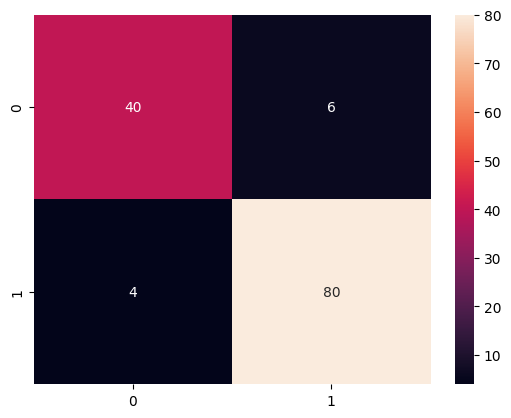

In [133]:
# ------------- RANDOM FOREST CLASSIFICATION (WITH TOP 5 CORRELATION)---------------

# target = kolom "class"
# cuma pake polyuria, polydipsia, gender, sudden weight loss, sama partial paresis
X = new_data.drop('class', axis=1)
y = new_data['class']

# Split the data  (training=75 and testing=25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_75 = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier_75.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_75.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_75 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_75 = precision

f1score = f1_score(y_test, y_pred)

f1score_75 = f1score

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)


Accuracy: 0.9038
Precision: 0.9100
F1-Score: 0.9231
Confusion Matrix:
[[ 68   8]
 [ 12 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        76
           1       0.94      0.91      0.92       132

    accuracy                           0.90       208
   macro avg       0.89      0.90      0.90       208
weighted avg       0.91      0.90      0.90       208



<Axes: >

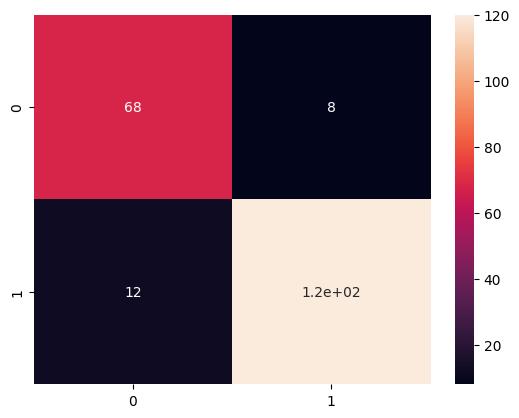

In [134]:
# ------------- RANDOM FOREST CLASSIFICATION (WITH TOP 5 CORRELATION)---------------

# target = kolom "class"
# cuma pake polyuria, polydipsia, gender, sudden weight loss, sama partial paresis
X = new_data.drop('class', axis=1)
y = new_data['class']

# Split the data  (training=60 and testing=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_60 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_60 = precision

f1score = f1_score(y_test, y_pred)

f1score_60 = f1score

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)


Accuracy: 0.9295
Precision: 0.9276
F1-Score: 0.9463
Confusion Matrix:
[[48  6]
 [ 5 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.94      0.95      0.95       102

    accuracy                           0.93       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.93      0.93      0.93       156



<Axes: >

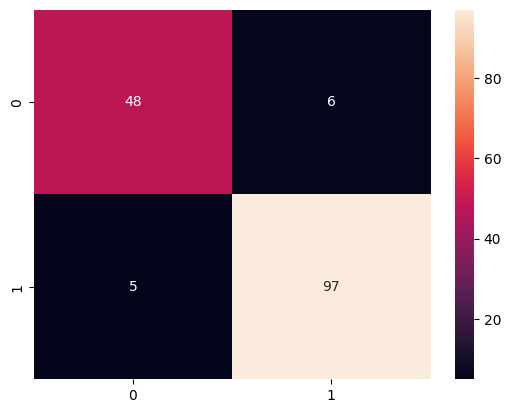

In [135]:
# ------------- RANDOM FOREST CLASSIFICATION (WITH TOP 5 CORRELATION)---------------

# target = kolom "class"
# cuma pake polyuria, polydipsia, gender, sudden weight loss, sama partial paresis
X = new_data.drop('class', axis=1)
y = new_data['class']

# Split the data  (training=70 and testing=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_70 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_70 = precision

f1score = f1_score(y_test, y_pred)

f1score_70 = f1score

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)


Accuracy: 0.9231
Precision: 0.9210
F1-Score: 0.9444
Confusion Matrix:
[[28  5]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



<Axes: >

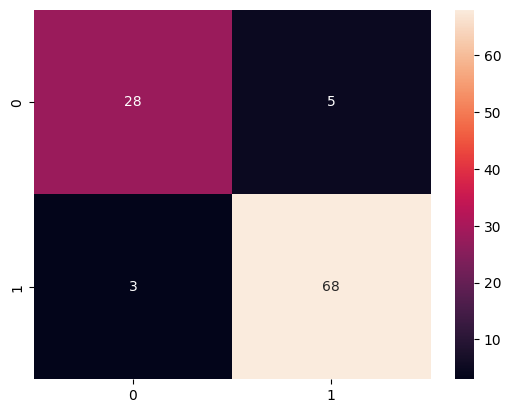

In [136]:
# ------------- RANDOM FOREST CLASSIFICATION (WITH TOP 5 CORRELATION)---------------

# target = kolom "class"
# cuma pake polyuria, polydipsia, gender, sudden weight loss, sama partial paresis
X = new_data.drop('class', axis=1)
y = new_data['class']

# Split the data  (training=80 and testing=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier_80 = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier_80.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier_80.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_80 = accuracy

precision = average_precision_score(y_test, y_pred)

precision_80 = precision

f1score = f1_score(y_test, y_pred)

f1score_80 = f1score

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-Score: {f1score:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

import seaborn as sns
sns.heatmap(conf_matrix, annot=True)


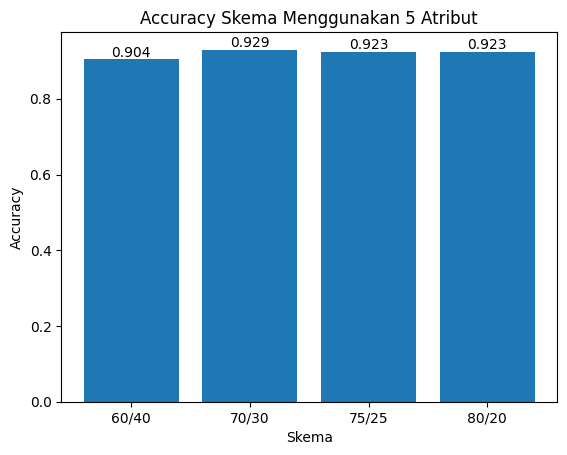

In [137]:
import matplotlib.pyplot as plt

skema = ['60/40', '70/30', '75/25', '80/20']
akurasi_skema = [accuracy_60, accuracy_70, accuracy_75, accuracy_80]
presisi_skema = [precision_60, precision_70, precision_75, precision_80]

# subplot 1
plt.bar(skema, akurasi_skema)
plt.title('Accuracy Skema Menggunakan 5 Atribut')
plt.xlabel('Skema')
plt.ylabel('Accuracy')

# Adding labels to the bars
for i in range(len(skema)):
    plt.text(skema[i], akurasi_skema[i], f'{akurasi_skema[i]:.3f}', ha='center', va='bottom')

# 3f nya buat naro 3 angka di belakang koma
plt.show()


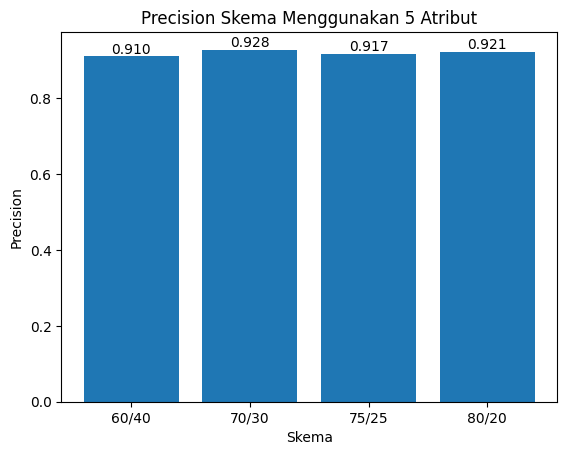

In [138]:
import matplotlib.pyplot as plt

skema = ['60/40', '70/30', '75/25', '80/20']
presisi_skema = [precision_60, precision_70, precision_75, precision_80]

plt.bar(skema, presisi_skema)
plt.title('Precision Skema Menggunakan 5 Atribut')
plt.xlabel('Skema')
plt.ylabel('Precision')

# Adding labels to the bars
for i in range(len(skema)):
    plt.text(skema[i], presisi_skema[i], f'{presisi_skema[i]:.3f}', ha='center', va='bottom')

# 3f nya buat naro 3 angka di belakang koma
plt.show()


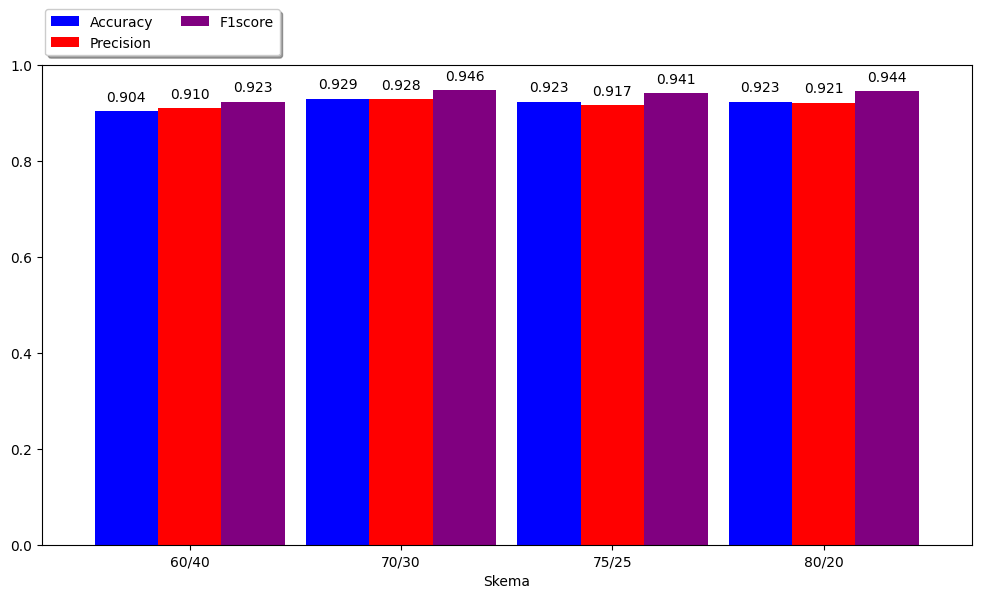

In [139]:
# Library Import(numpy and matplotlib)
import pandas as pd 
import matplotlib.pyplot as plot 

# Make a data definition
_data=[["60/40",accuracy_60, precision_60, f1score_60],
      ["70/30",accuracy_70, precision_70, f1score_70],
      ["75/25",accuracy_75, precision_75, f1score_75],
      ["80/20",accuracy_80, precision_80, f1score_80]
     ]
 
# Colors 
graph_color =['blue', 'red', 'purple']
 
# Draw a multi-colored bar chart.
_df = pd.DataFrame(_data,columns=["Skema", "Accuracy", "Precision", "F1score"])
 
ax = _df.plot(x="Skema", y=["Accuracy", "Precision", "F1score"], kind="bar", figsize=(12,6), color=graph_color, width=0.9)

# Set y-axis range from 0.0 to 1.0
ax.set_ylim(0.0, 1.0)

# Adjust the top margin without affecting the height of the graph
plt.subplots_adjust(bottom=0.1, top=0.9)

ax.legend(["Accuracy", "Precision", "F1score"], loc='upper center', bbox_to_anchor=(0.13, 1.13), fancybox=True, shadow=True, ncol=2)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


In [140]:
# ----------------- PREDICTION -------------------
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)


#INPUT
print("Isi 1 jika mengalami Polyuria, 0 jika tidak")
polyuria = int(input("Polyuria = "))
print(polyuria)

print("Isi 1 jika mengalami Polydipsia, 0 jika tidak")
polydipsia = int(input("Polydipsia = "))
print(polydipsia)

print("Isi 1 jika perempuan, 0 jika tidak")
gender = int(input("Gender (Male/Female) = "))
print(gender)

print("Isi 1 jika mengalami Sudden Weight Loss, 0 jika tidak")
swl = int(input("Sudden Weight Loss = "))
print(swl)

print("Isi 1 jika mengalami Partial Paresis, 0 jika tidak")
parpar = int(input("Partial Paresis = "))
print(parpar)

# Create a DataFrame with the user input
user_data = pd.DataFrame({
    'Polyuria': [polyuria],
    'Polydipsia': [polydipsia],
    'Gender': [gender],
    'Sudden Weight Loss': [swl],
    'Partial Paresis': [parpar]
})

# Print the user data DataFrame
print('User Data:\n', user_data)
print('User Data Shape:', user_data.shape)
print('User Data Columns:', user_data.columns)

Train = [polyuria, polydipsia, gender, swl, parpar]
print(Train)

test = pd.DataFrame(Train).T

predtest = rf_classifier_80.predict(test)

print("Classification =", predtest)

if predtest==1:
    print("Pasien terkena diabetes")
else:
    print("Pasien tidak terkena diabetes")


Isi 1 jika mengalami Polyuria, 0 jika tidak
0
Isi 1 jika mengalami Polydipsia, 0 jika tidak
0
Isi 1 jika perempuan, 0 jika tidak
0
Isi 1 jika mengalami Sudden Weight Loss, 0 jika tidak
1
Isi 1 jika mengalami Partial Paresis, 0 jika tidak
1
User Data:
    Polyuria  Polydipsia  Gender  Sudden Weight Loss  Partial Paresis
0         0           0       0                   1                1
User Data Shape: (1, 5)
User Data Columns: Index(['Polyuria', 'Polydipsia', 'Gender', 'Sudden Weight Loss',
       'Partial Paresis'],
      dtype='object')
[0, 0, 0, 1, 1]
Classification = [0]
Pasien tidak terkena diabetes


c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
